# PROJECT OF CLASSIFICATION OF CLOTHES

## The task is to use image to show its class of clothes

### Import the useful librairies and the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [2]:
fashion_train_df = pd.read_csv('input/fashion-mnist_train.csv', sep=',')

In [3]:
fashion_test_df = pd.read_csv('input/fashion-mnist_test.csv', sep=',')

In [5]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.shape

(60000, 785)

In [11]:
fashion_test_df.shape

(10000, 785)

In [5]:
training =  np.array(fashion_train_df, dtype='float32')

In [6]:
testing = np.array(fashion_test_df, dtype='float32')

### Visualisation of the data

6.0

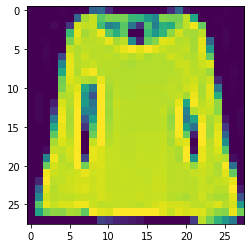

In [7]:
i = random.randint(1, 60000)
plt.imshow(training[i, 1:].reshape(28, 28))
label = training[i, 0]
label

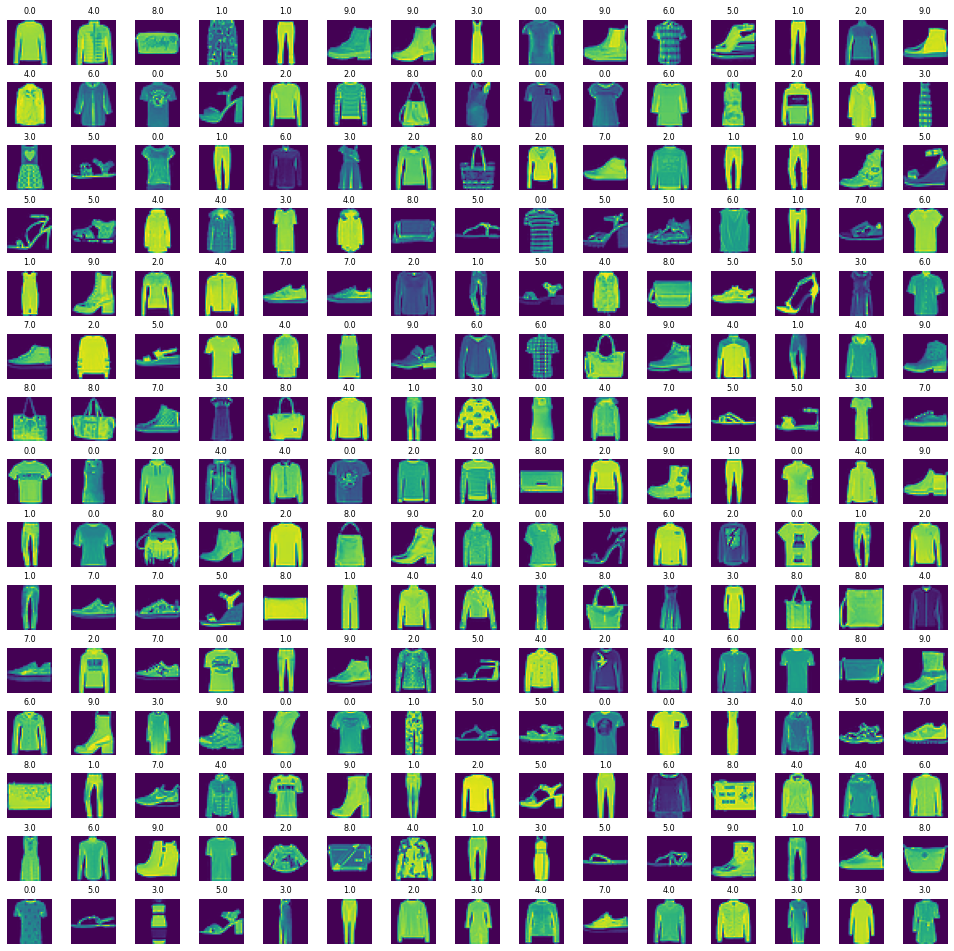

In [8]:
# let's define images viez in grid format
# dimension of the grid 
w_grid = 15
h_grid = 15

fig, axes = plt.subplots(h_grid, w_grid, figsize=(17, 17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 255 array

n_training = len(training) # length of the dataset

# select a random number from 0 to n_trainng

for i in np.arange(0, w_grid * h_grid):
    #select a random number 
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow(training[index,1:].reshape((28, 28)) )
    axes[i].set_title(training[index, 0], fontsize = 8)
    axes[i].axis('off')
    
    
plt.subplots_adjust(hspace=0.4)

### Training the model

In [9]:
X_train = training[:, 1:]/255
y_train = training[:, 0] # I am an IT PROG

In [10]:
X_test = testing[:, 1:]/255
y_test = testing[:, 0]

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, test_size=0.2, random_state = 12345)

In [17]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))

In [18]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))

In [19]:
X_test  = X_test.reshape(X_test.shape[0], *(28, 28, 1))

In [20]:
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))

In [21]:
X_train.shape

(48000, 28, 28, 1)

In [22]:
X_test.shape

(10000, 28, 28, 1)

In [23]:
X_validate.shape

(12000, 28, 28, 1)

In [25]:
!pip install keras

In [26]:
import keras

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

In [27]:
!pip install tensorflow

     |████████████████████████████████| 394.4 MB 3.3 kB/s eta 0:00:013  |▏                               | 2.3 MB 340 kB/s eta 0:19:13     |██████████                      | 124.5 MB 2.6 MB/s eta 0:01:44     |███████████                     | 134.5 MB 1.8 MB/s eta 0:02:27     |███████████████                 | 184.8 MB 3.4 MB/s eta 0:01:02     |████████████████▋               | 205.1 MB 483 kB/s eta 0:06:32     |█████████████████▎              | 212.6 MB 3.7 MB/s eta 0:00:49     |█████████████████▌              | 215.0 MB 4.5 MB/s eta 0:00:41     |███████████████████             | 233.7 MB 2.4 MB/s eta 0:01:07     |███████████████████▍            | 239.6 MB 4.9 MB/s eta 0:00:32     |████████████████████▊           | 255.4 MB 284 kB/s eta 0:08:08     |██████████████████████▊         | 280.2 MB 2.8 MB/s eta 0:00:41     |██████████████████████▊         | 280.6 MB 2.8 MB/s eta 0:00:41     |███████████████████████▌        | 290.3 MB 2.3 MB/s eta 0:00:45     |████████████████████████▏       

In [28]:
import keras

In [29]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [31]:
cnn_model = Sequential()

In [32]:
cnn_model.add(Conv2D(32, 3, 3, input_shape = (28, 28, 1), activation = 'relu'))

In [33]:
cnn_model.add(MaxPooling2D(pool_size = (2, 2 )))

In [34]:
cnn_model.add(Flatten())

In [40]:
cnn_model.add(Dense(units = 32, activation = 'relu'))

In [42]:
cnn_model.add(Dense(units = 10, activation = 'sigmoid'))

In [43]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['accuracy'])

In [48]:
epochs = 100

In [49]:
cnn_model.fit(X_train,
             y_train,
             batch_size=512,
             epochs=  epochs,
             verbose=1,
             validation_data=(X_validate, y_validate))

Epoch 1/100
94/94 [==============================] - 2s 25ms/step - loss: 0.3376 - accuracy: 0.8767 - val_loss: 0.3703 - val_accuracy: 0.8668
Epoch 2/100
94/94 [==============================] - 2s 23ms/step - loss: 0.3391 - accuracy: 0.8765 - val_loss: 0.3704 - val_accuracy: 0.8667
Epoch 3/100
94/94 [==============================] - 2s 23ms/step - loss: 0.3347 - accuracy: 0.8786 - val_loss: 0.3717 - val_accuracy: 0.8672
Epoch 4/100
94/94 [==============================] - 2s 23ms/step - loss: 0.3366 - accuracy: 0.8771 - val_loss: 0.3756 - val_accuracy: 0.8628
Epoch 5/100
94/94 [==============================] - 2s 22ms/step - loss: 0.3328 - accuracy: 0.8794 - val_loss: 0.3724 - val_accuracy: 0.8663
Epoch 6/100
94/94 [==============================] - 2s 21ms/step - loss: 0.3311 - accuracy: 0.8793 - val_loss: 0.3686 - val_accuracy: 0.8665
Epoch 7/100
94/94 [==============================] - 2s 21ms/step - loss: 0.3289 - accuracy: 0.8800 - val_loss: 0.3699 - val_accuracy: 0.8673
Epoch 

94/94 [==============================] - 2s 23ms/step - loss: 0.2842 - accuracy: 0.8962 - val_loss: 0.3591 - val_accuracy: 0.8728
Epoch 59/100
94/94 [==============================] - 2s 24ms/step - loss: 0.2819 - accuracy: 0.8958 - val_loss: 0.3592 - val_accuracy: 0.8737
Epoch 60/100
94/94 [==============================] - 2s 24ms/step - loss: 0.2827 - accuracy: 0.8970 - val_loss: 0.3686 - val_accuracy: 0.8707
Epoch 61/100
94/94 [==============================] - 2s 24ms/step - loss: 0.2817 - accuracy: 0.8965 - val_loss: 0.3666 - val_accuracy: 0.8699
Epoch 62/100
94/94 [==============================] - 3s 28ms/step - loss: 0.2824 - accuracy: 0.8960 - val_loss: 0.3598 - val_accuracy: 0.8712
Epoch 63/100
94/94 [==============================] - 3s 29ms/step - loss: 0.2793 - accuracy: 0.8981 - val_loss: 0.3688 - val_accuracy: 0.8673
Epoch 64/100
94/94 [==============================] - 2s 24ms/step - loss: 0.2812 - accuracy: 0.8975 - val_loss: 0.3634 - val_accuracy: 0.8723
Epoch 65/100

### Evaluation of the model